In [ ]:
from __future__ import print_function

import pandas as pd
pd.__version__
import matplotlib.pyplot as plt


## Reading in the data

In [ ]:
q = pd.read_csv("C4Questions.csv", sep=",")
uc = pd.read_csv("C4UsersCourses.csv", sep = ",")
q.head()
uc.head()

,user,course_id,Team
0,636031,21320,Black
1,635993,21320,Black
2,636008,21320,Black
3,636010,21320,Black
4,635988,21320,Black


## Data Exploration

In [ ]:
user_teams = q[['user', 'avg_rating', 'AcademicMark']].merge(uc[['user', 'course_id', 'Team']], on = 'user', how = 'inner')
cleaned_user_teams = user_teams.dropna()
display(cleaned_user_teams)

,user,avg_rating,AcademicMark,course_id,Team
1,635990,3.75,5.0,21320,Brown
4,636029,3.40,4.0,21320,Pink
5,636019,2.80,3.0,21320,Green
8,635992,4.00,4.0,21320,Pink
10,635988,3.00,3.0,21320,Black
...,...,...,...,...,...
528,636916,4.00,4.0,21328,Green
530,637257,3.00,3.0,21328,Yellow
532,637271,4.00,4.0,21328,Brown
533,637268,3.00,3.0,21328,White


In [35]:
count = cleaned_user_teams.groupby('Team').nunique()
display(count)

,user,avg_rating,AcademicMark,course_id
Team,,,,
Black,35,15,3,4
Blue,33,12,3,4
Brown,36,19,5,4
Green,37,15,3,4
Pink,37,13,4,4
Purple,15,8,3,2
Red,37,16,4,4
White,23,11,3,3
Yellow,30,13,3,4


In [ ]:
team_scores = cleaned_user_teams.groupby('Team', as_index = False).mean()
display(team_scores)

,Team,user,avg_rating,AcademicMark,course_id
0,Black,636835.472222,3.269722,3.611111,21325.083333
1,Blue,625487.333333,3.866061,4.000000,21325.121212
2,Brown,628317.342105,3.096053,3.447368,21325.184211
3,Green,626035.567568,3.433784,3.783784,21325.081081
4,Pink,632412.289474,3.525526,3.763158,21325.105263
5,Purple,636835.176471,3.774118,4.058824,21326.294118
6,Red,632743.921053,3.427895,3.842105,21325.210526
7,White,632730.125000,3.772917,4.041667,21326.791667
8,Yellow,636763.032258,3.283226,3.580645,21326.709677


In [34]:
group_count = team_scores.count()
display(group_count)

Team            9
user            9
avg_rating      9
AcademicMark    9
course_id       9
dtype: int64

# Visualisations

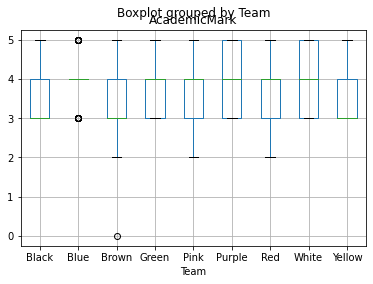

In [17]:
cleaned_user_teams.boxplot('AcademicMark', 'Team')